# Monitoria da semana 05

## Lembretes

*   Mínimo de 42 questões;
*   Mínimo de 5 presenças nas webconferêcias;
*   Duas participações em monitorias, um abono de falta;
*   Fazer choradeira.
    - Quantidade baixa de alunos aprovados ou próximos da aprovação
    - Email para a captura dos `User_Id`

### Conteúdo
*   Redes neurais artificiais;
*   Redes neurais convulocionais.

# Aplicação de CNN para classificação de imagens

#### Estudo de caso
</br>

<img src="https://i0.wp.com/www.alphr.com/wp-content/uploads/2016/07/whos_that_pokemon.png" alt="drawing" width="500"/>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import *

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        #for f in files:
        #    print('{}{}'.format(subindent, f))

In [3]:
root_folder = 'data'
train_folder = 'data/train/'
test_folder = 'data/test/'

#### Organização dos dados

In [5]:
list_files(root_folder)

data/
    test/
        fire/
        water/
    train/
        fire/
        water/


#### Criação automática dos nomes das classes (labels)

In [6]:
subfolders = [ label_folder.path for label_folder in os.scandir(train_folder) if label_folder.is_dir() ]

In [7]:
labels = [label.split('/')[len(label.split('/'))-1] for label in subfolders]

In [8]:
labels

['fire', 'water']

#### Tamanho das imagens de entrada

In [9]:
img_size = 32

#### Transformação dos dados imagem > array

In [10]:
def get_data(data_dir, labels, img_size):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

#### Configuração dos conjuntos de treino / teste

In [11]:
train = get_data(train_folder, labels, img_size)
test = get_data(test_folder, labels, img_size)

#### Apresentação singela (peba) dos dados

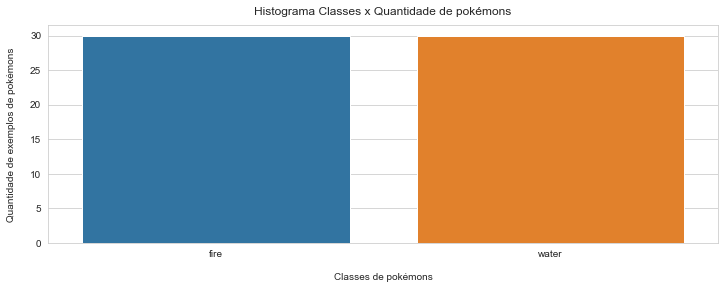

In [12]:
l = list()
for i in train:
    if(i[1] == 0):
        l.append('fire')
    else:
        l.append('water')
        
plt.figure(figsize=(12,4))        
sns.set_style('whitegrid')
sns.countplot(l)

plt.xlabel("Classes de pokémons", labelpad=14)
plt.ylabel("Quantidade de exemplos de pokémons", labelpad=14)

plt.title("Histograma Classes x Quantidade de pokémons", y=1.02);

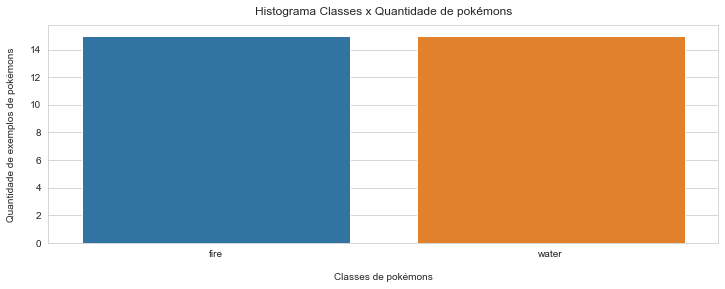

In [13]:
l = list()
for i in test:
    if(i[1] == 0):
        l.append('fire')
    else:
        l.append('water')

plt.figure(figsize=(12,4))        

sns.set_style('whitegrid')
sns.countplot(l)

plt.xlabel("Classes de pokémons", labelpad=14)
plt.ylabel("Quantidade de exemplos de pokémons", labelpad=14)

plt.title("Histograma Classes x Quantidade de pokémons", y=1.02);

#### Exemplo

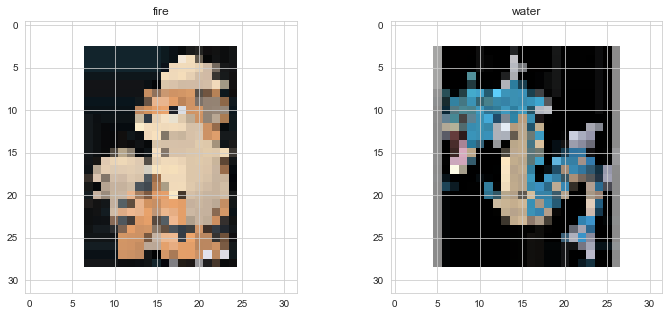

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))

fig.add_subplot(1,2,1)
plt.title(labels[train[0][1]])
plt.imshow(train[5][0])

fig.add_subplot(1,2,2)
plt.title(labels[train[-1][1]])
plt.imshow(train[-5][0])

plt.show()

#### Partição dos dados de treino e teste

In [16]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
# 0 ... 255
# 0 ... 1

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Rede Neural

<img src="https://miro.medium.com/max/960/1*ekOVM7MUcWBLx-egd60Yug.png" alt="drawing" width="500"/>


#### Rede Neural Convolucional

<img src="https://docs.ecognition.com/v9.5.0/Resources/Images/ECogUsr/UG_CNN_scheme.png" alt="drawing" width="500"/>


In [18]:
model = Sequential()
model.add(Conv2D(32,3, padding='same', activation='relu', 
                 input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(16,activation='relu'))
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)         

In [34]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [35]:
#model.get_weights()[4]

In [36]:
epochs = 300

In [37]:
history = model.fit(x_train, y_train ,epochs = epochs , validation_data = (x_test, y_test), verbose=1)

Epoch 1/300
2/2 [==============================] - 2s 665ms/step - loss: 5.7244e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 2/300
2/2 [==============================] - 0s 204ms/step - loss: 6.3454e-05 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 3/300
2/2 [==============================] - 0s 169ms/step - loss: 2.6720e-04 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 4/300
2/2 [==============================] - 0s 180ms/step - loss: 4.9696e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/300
2/2 [==============================] - 0s 154ms/step - loss: 1.1060e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/300
2/2 [==============================] - 0s 153ms/step - loss: 1.1370e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/300
2/2 [==============================] - 0s 161ms/step - loss: 3.8665e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_ac

2/2 [==============================] - 0s 139ms/step - loss: 7.9109e-05 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 58/300
2/2 [==============================] - 0s 132ms/step - loss: 4.6809e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 59/300
2/2 [==============================] - 0s 148ms/step - loss: 3.5035e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 60/300
2/2 [==============================] - 0s 129ms/step - loss: 8.5314e-05 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 61/300
2/2 [==============================] - 0s 134ms/step - loss: 1.5125e-04 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 62/300
2/2 [==============================] - 0s 126ms/step - loss: 1.2861e-04 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 63/300
2/2 [==============================] - 0s 173ms/step - loss: 7.5115e-05 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy

Epoch 113/300
2/2 [==============================] - 0s 123ms/step - loss: 1.1774e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 114/300
2/2 [==============================] - 0s 127ms/step - loss: 1.4534e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 115/300
2/2 [==============================] - 0s 129ms/step - loss: 5.0265e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 116/300
2/2 [==============================] - 0s 151ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 117/300
2/2 [==============================] - 0s 148ms/step - loss: 1.7067e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9667
Epoch 118/300
2/2 [==============================] - 0s 148ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9667
Epoch 119/300
2/2 [==============================] - 0s 158ms/step - loss: 5.2175e-04 - accuracy: 1.0000 - val_loss: 0.0079 - 

2/2 [==============================] - 0s 143ms/step - loss: 8.7319e-05 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 170/300
2/2 [==============================] - 0s 200ms/step - loss: 2.5799e-05 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 171/300
2/2 [==============================] - 0s 166ms/step - loss: 1.3440e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 172/300
2/2 [==============================] - 0s 159ms/step - loss: 5.5197e-05 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 173/300
2/2 [==============================] - 0s 147ms/step - loss: 5.4775e-05 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 174/300
2/2 [==============================] - 0s 199ms/step - loss: 8.2299e-05 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 175/300
2/2 [==============================] - 0s 267ms/step - loss: 2.1672e-05 - accuracy: 1.0000 - val_loss: 0.0073 - val_ac

Epoch 225/300
2/2 [==============================] - ETA: 0s - loss: 8.3493e-05 - accuracy: 1.00 - 0s 126ms/step - loss: 2.1585e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 226/300
2/2 [==============================] - 0s 147ms/step - loss: 5.2208e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 227/300
2/2 [==============================] - 0s 139ms/step - loss: 5.9949e-05 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 228/300
2/2 [==============================] - 0s 138ms/step - loss: 3.8467e-05 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 229/300
2/2 [==============================] - 0s 135ms/step - loss: 4.5815e-05 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 230/300
2/2 [==============================] - 0s 131ms/step - loss: 2.8749e-05 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 231/300
2/2 [==============================] - 0s 150ms/step - los

2/2 [==============================] - 0s 120ms/step - loss: 5.1651e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 281/300
2/2 [==============================] - 0s 142ms/step - loss: 5.3800e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 282/300
2/2 [==============================] - 0s 138ms/step - loss: 1.5375e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 283/300
2/2 [==============================] - 0s 159ms/step - loss: 1.8455e-04 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 284/300
2/2 [==============================] - 0s 153ms/step - loss: 4.8501e-05 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 285/300
2/2 [==============================] - 0s 137ms/step - loss: 1.0074e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 286/300
2/2 [==============================] - 0s 132ms/step - loss: 4.8699e-05 - accuracy: 1.0000 - val_loss: 0.0032 - val_ac

In [38]:
tf.saved_model.save(model, 'pokemodel')

INFO:tensorflow:Assets written to: pokemodel\assets


### Análise

#### Taxas de aprendizado, treino e validação ...

eixo x

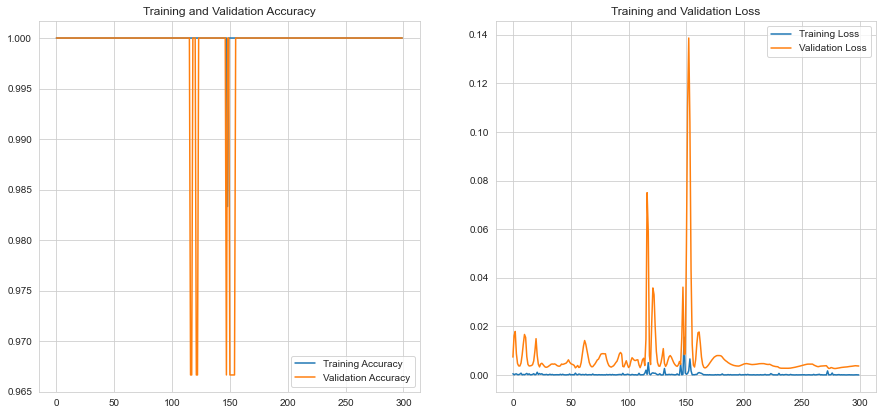

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Relatório do Classificador

In [41]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Fire (Class 0)','Water (Class 1)']))

                 precision    recall  f1-score   support

 Fire (Class 0)       1.00      1.00      1.00        15
Water (Class 1)       1.00      1.00      1.00        15

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



- $p = \frac{t_p}{t_p+f_p}$
- $r = \frac{t_p}{t_p+f_n}$
- $f1 = \frac{2 \times p \times r}{p+r}$
- `support` é o número de ocorrências de cada classe no is the number of occurrences of each class in `y_true`.

### Avaliação ROC

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict_classes(x_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

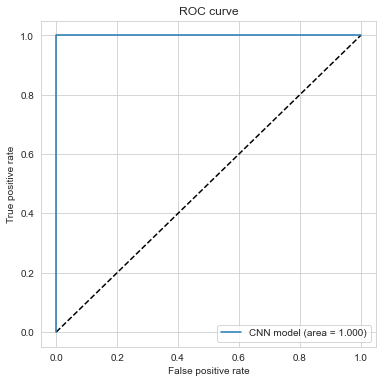

In [43]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Predições

#### Carregamento da imagem

In [64]:
img_pred = cv2.imread('175.png')[...,::-1] #convert BGR to RGB format
img_pred_arr = cv2.resize(img_pred, (img_size, img_size))

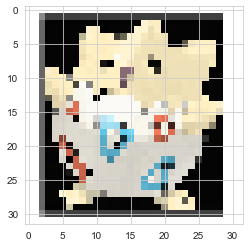

In [65]:
plt.imshow(Image.fromarray(np.uint8(img_pred_arr)))

In [66]:
img_pred_arr.shape

(32, 32, 3)

#### Captura dos resultados da predição

In [67]:
predict_pkm = model.predict(tf.reshape(img_pred_arr, [1, img_size, img_size, 3]))

In [68]:
predict_pkm

array([[0., 1.]], dtype=float32)

#### Identificação da classe predita

In [63]:
labels[predict_pkm.tolist()[0].index(max(predict_pkm.tolist()[0]))]

'fire'

# Recomendações

| Python Machine Learning       | Deep Learning with TensorFlow 2 and Keras           | Deep Learning with Python  |
| ------------- |---------------| ------|
|<img src="https://images-na.ssl-images-amazon.com/images/I/71DoK1IGBgL.jpg" alt="drawing" width="200"/>      | <img src="https://insidebigdata.com/wp-content/uploads/2020/07/Packt_DeepLearning_TensorFlow_Keras.png" alt="drawing" width="200"/> | <img src="https://www.siq.com.br/wp-content/uploads/2020/01/Imagem6-241x300.png" alt="drawing" width="200"/> |

Artigos:
- [Performance Analysis of Various Activation Functions in Generalized MLP Architectures of Neural Networks](https://www.researchgate.net/publication/228813985_Performance_Analysis_of_Various_Activation_Functions_in_Generalized_MLP_Architectures_of_Neural_Networks)